# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: What is the age group of most frequent users?
When are the bikes used the most? Weekends? Holidays? Weekdays? Which month has the most number of trips reported? What time of the day are the most number of trips reported?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [40]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import numpy as npy
import collections
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [41]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))

    with open(filename, 'r') as f:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f)

        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)

        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
    pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)


# list of files for each city
data_files = ['NYC-CitiBike-2016.csv',
              'Chicago-Divvy-2016.csv',
              'Washington-CapitalBikeshare-2016.csv']

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
print(' ')
print(' ')
pprint(example_trips)


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [42]:
#This function is used to convert or standardize the unit of time in each city file into minutes

def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    ##Checking for each city and standardizing the time to minutes##
    
    if city == 'NYC':
        duration = datum['tripduration']
        duration = float(duration) / 60
    elif city == 'Chicago':
        duration = datum['tripduration']
        duration = float(duration)/60 

    elif city == 'Washington':
        duration = datum['Duration (ms)']
        duration = float(duration)/(60*1000)##Since the time given for Washington is in seconds we convert it into minutes##
                                            ##by dividing it by 60 * 1000##

    return duration

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [43]:
#This function is used to standardize the date and times given in each of the files.

def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    ## To standardize the date format in each file##
    ##The format is changed to M/D/Y H:M and then from that the month, hour and day of the week are extracted and returned 
    ##seperately##
    

    if city == 'NYC':
        my_date = datum['starttime']
        date = datetime.strptime(my_date, "%m/%d/%Y %H:%M:%S")
        month = date.month
        hour = date.hour
        day_of_week = date.strftime('%A')
    
    
    elif city == 'Chicago':
        my_date = datum['starttime']
        date = datetime.strptime(my_date, "%m/%d/%Y %H:%M")
        month = date.month
        hour = date.hour
        day_of_week = date.strftime('%A')

    elif city == 'Washington':
        my_date = datum['Start date']
        date = datetime.strptime(my_date, "%m/%d/%Y %H:%M")
        month = date.month
        hour = date.hour
        day_of_week = date.strftime('%A')

    
    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [44]:
#This function is used to standardize the user types in each city files.

def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    ##To standardize the user type##
    
    if city == 'NYC':
        user_type = datum['usertype']

    if city == 'Chicago':
        user_type = datum['usertype']

    elif city == 'Washington':
        user_type1 = datum['Member Type']
        ##In Washington file the user type is given as registered and casual. So inorder to change it to Subscriber and Customer##
        
        if user_type1 == 'Registered':
            user_type = 'Subscriber'
        elif user_type1 == 'Casual':
            user_type = 'Customer'
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [45]:
#This functions helps us to create another file with the standardized data

def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'] = time_of_trip(row, city)[0]
            new_point['hour'] = time_of_trip(row, city)[1]
            new_point['day_of_week'] = time_of_trip(row, city)[2]
            new_point['user_type'] = type_of_user(row, city)


            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [46]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': 'Washington-CapitalBikeshare-2016.csv',
                            'out_file': 'Washington-2016-Summary.csv'},
             'Chicago': {'in_file': 'Chicago-Divvy-2016.csv',
                         'out_file': 'Chicago-2016-Summary.csv'},
             'NYC': {'in_file': 'NYC-CitiBike-2016.csv',
                     'out_file': 'NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])
    
    
    
'''
data_file = ['./data/Washington-2016-Summary.csv',
             './data/Chicago-2016-Summary.csv',
             './data/NYC-2016-Summary.csv']
'''


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


"\ndata_file = ['./data/Washington-2016-Summary.csv',\n             './data/Chicago-2016-Summary.csv',\n             './data/NYC-2016-Summary.csv']\n"

> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: NYC has the highest number of trips. NYC has the highest proportion of trips made by Subscribers. Chicago has the highest poportion of trips made by Customers.


In [48]:
#This function is used to find out the highest proportion of trips made by Customers and Subscribers in each city#
#It also calculates the total number of rides in each city#

def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    print("The total number of rides and the proportion of Subscribers & Customers are:")

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        # initialize count variables
        n_subscribers = 0
        n_customers = 0

        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1

        # compute total number of rides
        n_total = n_subscribers + n_customers

        
        sub_perc = (n_subscribers/n_total)*100 #to compute the proportion of subscribers in the city
        cust_perc = (n_customers/n_total)*100 #to compute the proportion of customers in the city
        
        return (n_total, sub_perc, cust_perc)
        
    
for city in city_info:
    data_file = city_info[city]['out_file']
    print(number_of_trips(data_file))



City: Washington
The total number of rides and the proportion of Subscribers & Customers are:
(66326, 78.0282242257938, 21.971775774206193)

City: Chicago
The total number of rides and the proportion of Subscribers & Customers are:
(72131, 76.22520136973007, 23.774798630269924)

City: NYC
The total number of rides and the proportion of Subscribers & Customers are:
(276798, 88.83590199351151, 11.164098006488485)


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: The average trip length of each city is as follows:
Washington - 18.93287355913721
Chicago - 16.563629368787335
NYC - 15.81259299802294

The proportion or % of rides greater than 30 minutes in each city is as follows:
Washington - 10.83888671109369
Chicago - 8.332062497400562
NYC - 7.3024371563378345

In [49]:
#This function is used to find the average trip time length in each city

def avg_trip(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    print("The Average Trip Length is:")
    
    l = []
    s = []
    with open(filename, 'r') as f_in:
        # set up csv reader object
        avg_reader = csv.DictReader(f_in)
        
        for row in avg_reader:
            l.append(float(row['duration']))
            
        total = sum([float(n) for n in l])
        number = len(l) # check whether len(l)-1 or just len(l)
        avg = total/number
 
        return avg
            
##Declaring the list data_file with the input file names or the standardized file names for further calling##
data_file = ['Washington-2016-Summary.csv',
             'Chicago-2016-Summary.csv',
             'NYC-2016-Summary.csv']

for datafile in data_file: 
    print(avg_trip(datafile))       



City: Washington
The Average Trip Length is:
18.93287355913721

City: Chicago
The Average Trip Length is:
16.563629368787335

City: NYC
The Average Trip Length is:
15.81259299802294


In [50]:
#This function helps us to determine the percentage of trips having trip lengths greater than 30 minutes.

def perc_trip(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    print("The percentage of riders having duration > 30 is:")
    
    l = []
    s = []
    with open(filename, 'r') as f_in:
        # set up csv reader object
        avg_reader = csv.DictReader(f_in)
        
        for row in avg_reader:
            l.append(float(row['duration']))
            
            
        ##To get the duration values above 30 minutes##
        t = [float(i) for i in l]
        
        for i in t:
            if i > 30:
                s.append(i)
        
        #To get the percentage of ride durations above 30 minutes#
        perc = float((len(s)/len(l))*100)
        
        return perc
      
        
for datafile in data_file: 
    print(perc_trip(datafile))


City: Washington
The percentage of riders having duration > 30 is:
10.83888671109369

City: Chicago
The percentage of riders having duration > 30 is:
8.332062497400562

City: NYC
The percentage of riders having duration > 30 is:
7.3024371563378345


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: I chose to take all three cities. In each of the cities the customer user type has longer rides average compared to subscribers.

In [51]:
#This function is used to get the average ride durations of customers and subscriners

def sub_cust_avg(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    print("Subscriber trip average and Customer trip average is")

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize lists
        l = [] #to store all the values to get the total count#
        s = [] #to store subscriber duration values#
        c = [] #to store customer duration values#
        
        #To cehck whether Subscriber or Customer and append the respective lists with the duration values#
        for row in reader:
            l.append(row)
            if row['user_type'] == 'Subscriber':
                s.append(row['duration'])
            else:
                c.append(row['duration'])
                
        total_count = len(l)
        sub_count = len(s)
        cust_count = len(c)
        
        sub_total = sum([float(n) for n in s]) #total no. of subscribers
        
        cust_total = sum([float(n) for n in c]) #total no. of customers
       
        
        sub_avg = sub_total/sub_count #subscriber average#
        cust_avg = cust_total/cust_count #Customer average#
        
        return(sub_avg, cust_avg)
                

for datafile in data_file: 
    print(sub_cust_avg(datafile))
        



City: Washington
Subscriber trip average and Customer trip average is
(12.528120499294745, 41.67803139252976)

City: Chicago
Subscriber trip average and Customer trip average is
(12.067201690250076, 30.979781133982506)

City: NYC
Subscriber trip average and Customer trip average is
(13.680790523907177, 32.77595139473187)


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

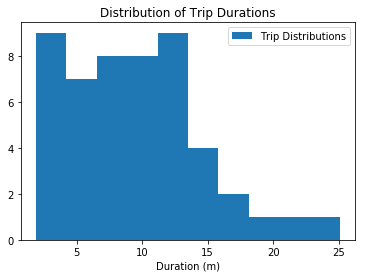

In [52]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
blue_patch = mpatches.Patch(label='Trip Distributions')
plt.legend(handles=[blue_patch])
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.


City: Washington


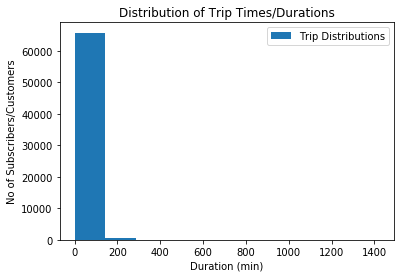


City: Chicago


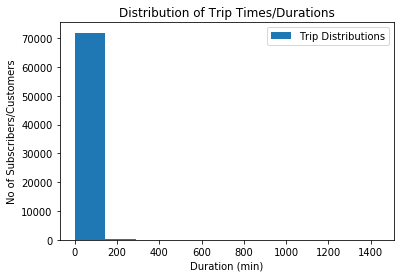


City: NYC


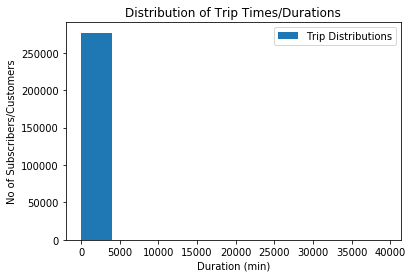

In [53]:
#To plot the trip times of each city as a histogram

%matplotlib inline

def trip_times_plot(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    l = [] #intialize a list
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        for row in reader:
            l.append(float(row['duration']))
        
        plt.hist(l)
        plt.xlabel('Duration (min)') #to label the x axis
        plt.ylabel('No of Subscribers/Customers') #to label the y axis
        plt.title('Distribution of Trip Times/Durations') #to display the title of the plot
        blue_patch = mpatches.Patch(label='Trip Distributions') #to customise legend like color, label etc.
        plt.legend(handles=[blue_patch]) #to display the legend
        plt.show() 
    
for datafile in data_file:
    trip_times_plot(datafile)


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: For each city's distribution the peak values for subscribers are as follows:
Washington - between 1-8 minutes
Chicago - between 1-18 minutes
NYC - between 1-8 minutes

For each city's distribution the peak values for customers are as follows:
Washington - between 18-22 minutes
Chicago - between 18-22 minutes
NYC - between 18-22 minutes


The shape of each distribution is right skewed.


City: Washington


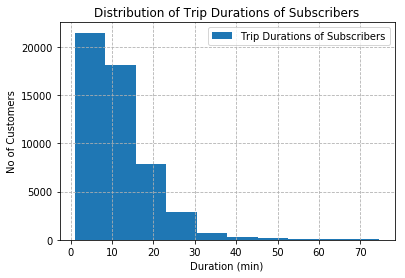


City: Chicago


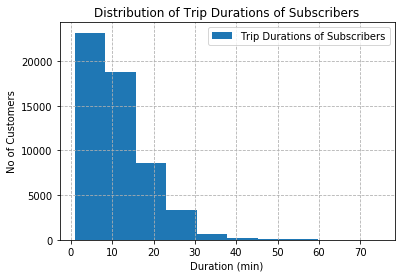


City: NYC


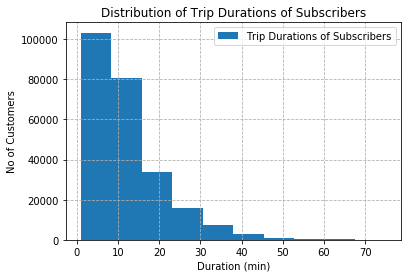

In [54]:
#To plot the Subscriber trip times of each city as a histogram limited to 75 minutes


def sub_trip_plot(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    #initialize lists
    s = []
    s_new = []
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        for row in reader:
            if row['user_type'] == 'Subscriber': #checking for subscrciber data
                s.append(float(row['duration']))
        
        #to retrieve the data having duration<=75 minutes
        for i in s:
            if i<=75:
                 s_new.append(i)
        
        plt.hist(s_new)
        #axes = plt.gca()
        #axes.set_xlim([0, 75])
        plt.xlabel('Duration (min)') #to label the x axis
        plt.ylabel('No of Customers') #to label the y axis
        plt.title('Distribution of Trip Durations of Subscribers') #to display the title of the plot
        blue_patch = mpatches.Patch(label='Trip Durations of Subscribers') #to customise legend like color, label etc.
        plt.legend(handles=[blue_patch]) #to display the legend
        plt.grid(b=True, which='major', linestyle='--') #to display s grid in the plot
        plt.show()

for datafile in data_file:
    sub_trip_plot(datafile)





City: Washington


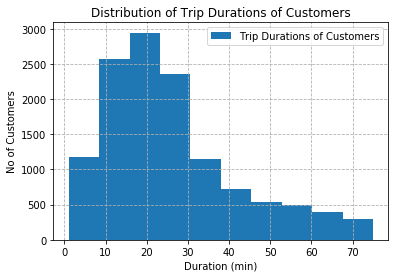


City: Chicago


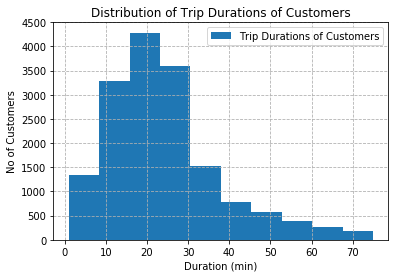


City: NYC


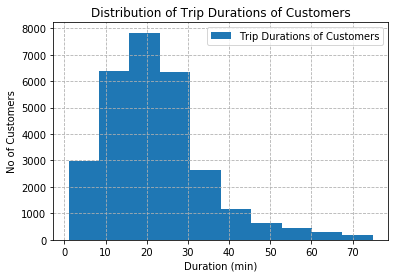

In [55]:
#To plot the Customer trip times of each city as a histogram limited to 75 minutes


def cust_trip_plot(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    #initialize lists
    c = []
    c_new = []
    
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        for row in reader:
            if row['user_type'] == 'Customer': #checking for subscrciber data
                c.append(float(row['duration']))
        
        #to retrieve the data having duration<=75 minutes
        for i in c:
            if i<=75:
                 c_new.append(i)
        
        plt.hist(c_new)
        #axes = plt.gca()
        #axes.set_xlim([0, 75])
        plt.xlabel('Duration (min)') #to label the x axis
        plt.ylabel('No of Customers') #to label the y axis
        plt.title('Distribution of Trip Durations of Customers') #to display the title of the plot
        blue_patch = mpatches.Patch(label='Trip Durations of Customers') #to customise legend like color, label etc.
        plt.legend(handles=[blue_patch]) #to display the legend
        plt.grid(b=True, which='major', linestyle='--') #to display s grid in the plot
        plt.show()

for datafile in data_file:
    cust_trip_plot(datafile)


<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: "Which is the hour in which the bikes are mostly used?". This is the question which I want to explore.


City: Washington


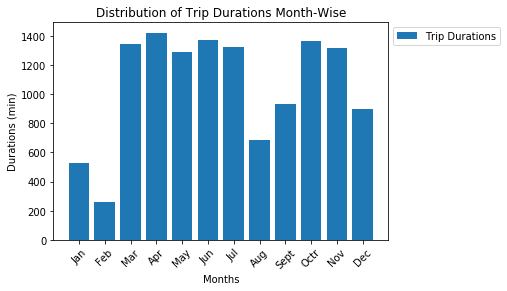


City: Chicago


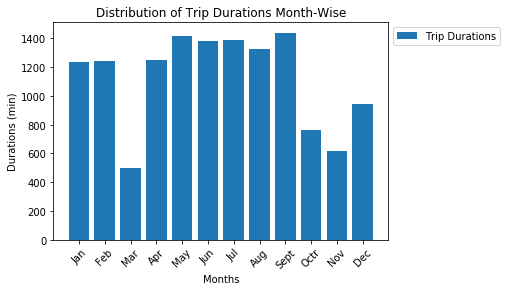


City: NYC


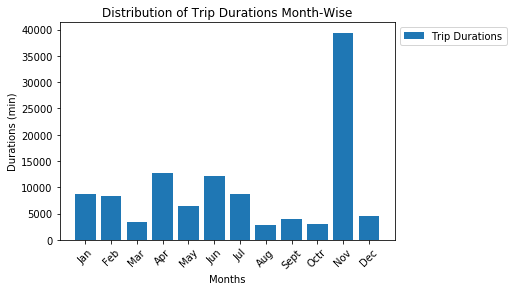

In [56]:
##Which month / season has the highest ridership?##

def month_highest_ridership(filename):        
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))


    months= {
        "1": "Jan",
        "2": "Feb",
        "3": "Mar",
        "4": "Apr",
        "5": "May",
        "6": "Jun",
        "7": "Jul",
        "8": "Aug",
        "9": "Sept",
        "10": "Octr",
        "11": "Nov",
        "12": "Dec"
        }

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        #initilaizing dictionary
        results = {}
        
        for row in reader:
        # get month
            month = row["month"]
            if not (month in results):
                results[month] = float(row["duration"])
                continue
            #to get the maximum value
            if float(row["duration"]) > results[month]:
                results[month] = float(row["duration"])
        
        new_dict = {int(key): results[key] for key in results}
        
        #to create an ordered dictionary
        s = collections.OrderedDict(sorted(new_dict.items()))
        
        plt.bar(range(len(s)), s.values(), align='center') # to display a bar plot
        plt.xticks(range(len(months)), months.values(), rotation=45) #to display the x axis values against which we plot the graph
        plt.xlabel('Months') #to label the x axis
        plt.ylabel('Durations (min)') #to label the y axis
        plt.title('Distribution of Trip Durations Month-Wise') #to display the title of the plot
        
        blue_patch = mpatches.Patch(label='Trip Durations') #to customise legend like color, label etc.
        plt.legend(handles=[blue_patch], bbox_to_anchor=(1, 1), loc='best', ncol=1) #to display the legend
        plt.show()
    
        

for datafile in data_file:
    month_highest_ridership(datafile)



City: Washington


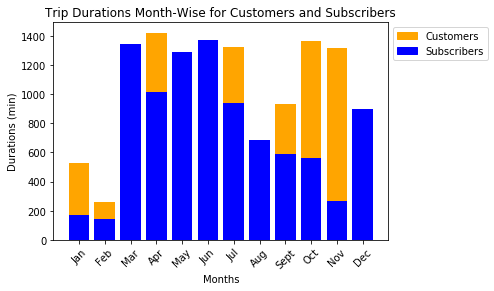


City: Chicago


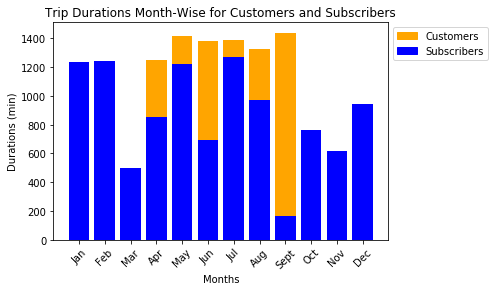


City: NYC


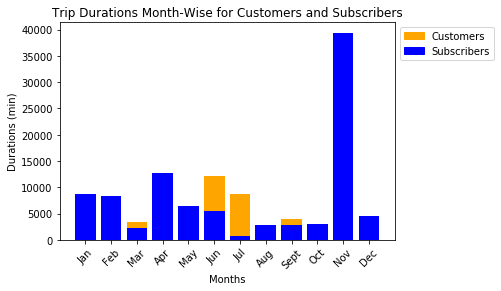

In [57]:
##The month / season with the highest ridership for customers and subscribers: a comparison##

def month_cust_sub(filename):    
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))

    months= {
        "1": "Jan",
        "2": "Feb",
        "3": "Mar",
        "4": "Apr",
        "5": "May",
        "6": "Jun",
        "7": "Jul",
        "8": "Aug",
        "9": "Sept",
        "10": "Oct",
        "11": "Nov",
        "12": "Dec"
        }

    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #initializing the dictionaries for both customers and subscribers
        c_results = {}
        s_results = {}
        
        for row in reader:
            if row['user_type'] == 'Customer': #to check for cutomer data
                c_month = row["month"]
                if not (c_month in c_results):
                    c_results[c_month] = float(row["duration"])
                    continue
                #to get the maximum value
                if float(row["duration"]) > c_results[c_month]:
                    c_results[c_month] = float(row["duration"])
                    
            elif row['user_type'] == 'Subscriber': #to check for subscriber data
                s_month = row["month"]
                if not (s_month in s_results):
                    s_results[s_month] = float(row["duration"])
                    continue
                #to get the maximum value
                if float(row["duration"]) > s_results[s_month]:
                    s_results[s_month] = float(row["duration"])
        
        #to convert the keys of the respective dictionaries from string to int
        c_dict = {int(key): c_results[key] for key in c_results}
        s_dict = {int(key): s_results[key] for key in s_results}
        
        #to get an ordered dictionary
        c = collections.OrderedDict(sorted(c_dict.items()))
        s = collections.OrderedDict(sorted(s_dict.items()))

        plt.bar(range(len(c)), c.values(), color='orange', align='center') # to plot the customer data
        plt.bar(range(len(s)), s.values(), color='blue', align='center') # to plot the subscriber data
        plt.xticks(range(len(months)), months.values(), rotation=45, color='black') #to display the x axis values against which 
                                                                                    #we plot the graph
        plt.yticks(color='black')
        
        plt.xlabel('Months') #to label the x axis

        plt.ylabel('Durations (min)') #to label the y axis

        
        plt.title('Trip Durations Month-Wise for Customers and Subscribers') #to display the title of the plot
        
        orange_patch = mpatches.Patch(color='orange', label='Customers') #to customise legend for customers
        blue_patch = mpatches.Patch(color='blue', label='Subscribers') #to customise legend for subscribers
        
        plt.legend(handles=[orange_patch, blue_patch], bbox_to_anchor=(1, 1), loc='best', ncol=1) #to display the legend
        
        plt.show()
    
        

for datafile in data_file:
    month_cust_sub(datafile)



City: Washington


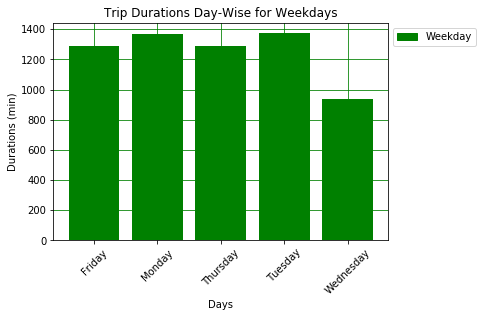

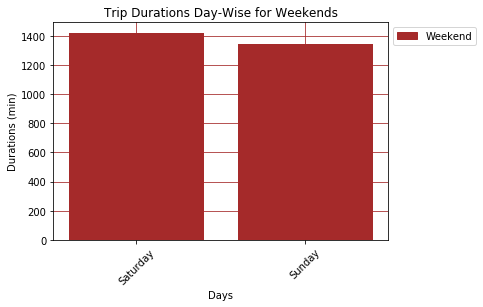


City: Chicago


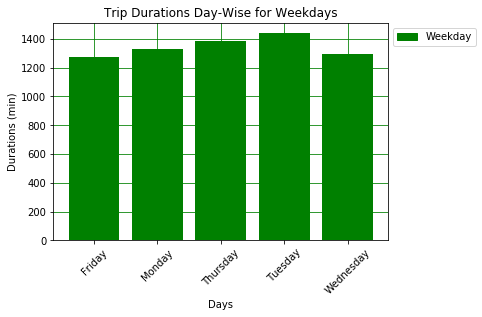

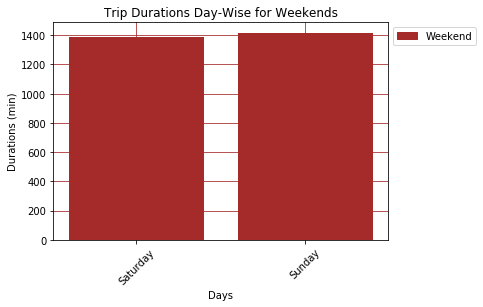


City: NYC


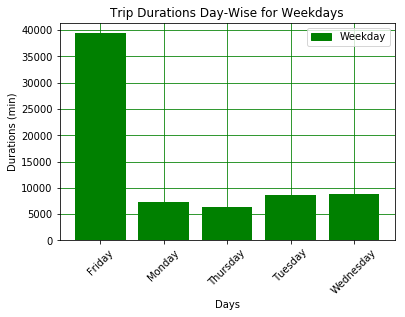

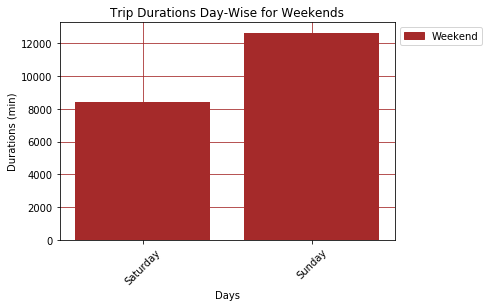

In [58]:
##Weekends/Weekdays: which have the highest ridership?##

def day_variations(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city)) 
    
    days = {
            "1": "Monday",
            "2": "Tuesday",
            "3": "Wednesday",
            "4": "Thursday",
            "5": "Friday",
            "6": "Saturday",
            "7": "Sunday"}

    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        
        #intializing lists and dictionaries
        wd = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
        we = ["Saturday", "Sunday"]
        wd_results = {} #to store weekday results
        we_results = {} #to store weekend results
        
        for row in reader:
            if row['day_of_week'] in wd:
                wd_day = row["day_of_week"]
                if not (wd_day in wd_results):
                    wd_results[wd_day] = float(row["duration"])
                    continue
                #to get the maximum value during weekdays
                if float(row["duration"]) > wd_results[wd_day]:
                    wd_results[wd_day] = float(row["duration"])
                    
            elif row['day_of_week'] in we:
                we_day = row["day_of_week"]
                if not (we_day in we_results):
                    we_results[we_day] = float(row["duration"])
                    continue
                #to get the maximum value during weekends
                if float(row["duration"]) > we_results[we_day]:
                    we_results[we_day] = float(row["duration"])
        
        #to get ordered dictionaries
        ord_wd = collections.OrderedDict(sorted(wd_results.items()))
        ord_we = collections.OrderedDict(sorted(we_results.items()))

        #to plot the bar plot for weekdays
        plt.bar(range(len(ord_wd)), ord_wd.values(), color='green', align='center')
        plt.xticks(range(len(ord_wd)), ord_wd.keys(), rotation=45, color='black')
        
        plt.xlabel('Days')
        plt.ylabel('Durations (min)')
        
        plt.title('Trip Durations Day-Wise for Weekdays')
        
        green_patch = mpatches.Patch(color='green', label='Weekday')
        plt.legend(handles=[green_patch], bbox_to_anchor=(1, 1), loc='best', ncol=1)
        plt.grid(b=True, which='major', color='green', linestyle='-')
        plt.show()
    
        #to plot the bar plot for weekends
        plt.bar(range(len(ord_we)), ord_we.values(), color='brown', align='center')
        plt.xticks(range(len(ord_we)), ord_we.keys(), rotation=45, color='black')
        plt.xlabel('Days')
        plt.ylabel('Durations (min)')
        
        plt.title('Trip Durations Day-Wise for Weekends')
        
        brown_patch = mpatches.Patch(color='brown', label='Weekend')
        plt.legend(handles=[brown_patch], bbox_to_anchor=(1, 1), loc='best', ncol=1)
        plt.grid(b=True, which='major', color='brown', linestyle='-')
        
        plt.show()

        
for datafile in data_file:
    day_variations(datafile)




City: Washington


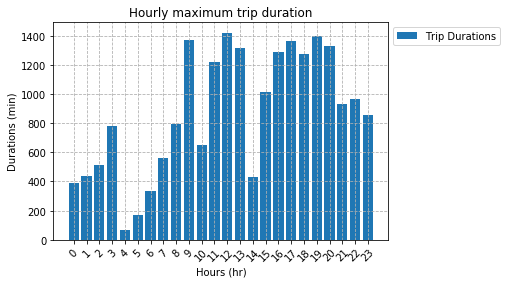


City: Chicago


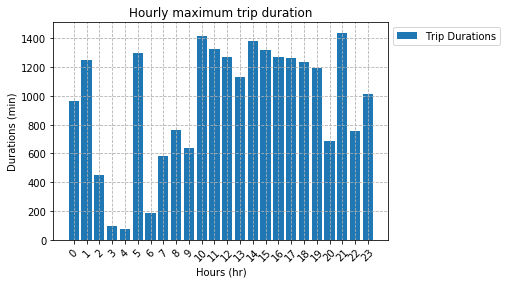


City: NYC


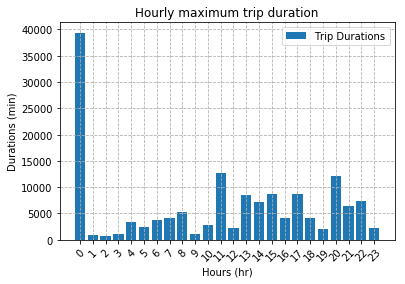

In [59]:
#This function is used to find the hour in which the trip length is the maximum in each city

def hour_length(filename):
    
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
##Which month / season has the highest ridership?##

    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)

        #initialize dictionary
        results = {}
        
        for row in reader:
        # get month
            hour = row["hour"]
            if not (hour in results):
                results[hour] = float(row["duration"])
                continue
            #to get the maximum value
            if float(row["duration"]) > results[hour]:
                results[hour] = float(row["duration"])
                
        #to convert the string type dictionary key to int type
        new_dict = {int(key): results[key] for key in results}
        
        #to get an ordered dictionary
        h = collections.OrderedDict(sorted(new_dict.items()))

        #to plot the bar graph
        plt.bar(range(len(h)), h.values(), align='center')
        plt.xticks(range(len(h)), h.keys(), rotation=45)
        plt.xlabel('Hours (hr)')
        plt.ylabel('Durations (min)')
        plt.title('Hourly maximum trip duration')
        
        blue_patch = mpatches.Patch(label='Trip Durations')
        plt.legend(handles=[blue_patch], bbox_to_anchor=(1, 1), loc='best', ncol=1)
        plt.grid(b=True, which='major', linestyle='--')
        plt.show()
    
        

for datafile in data_file:
    hour_length(datafile)


#### Findings

For the above visualizations the observations are recorded below.

1. For the function **month_highest_ridership** we can see that it records/displays, in the form of a bar plot, the month that has the maximum trip duration in a year from the respective files for each city.The month with max. duration from each city is as follows: 
    1.1. _Washington_ - April
    1.2. _Chicago_ - September 
    1.3. _NYC_ - November

2. The second function **month_cust_sub** shows us the usage of customers and subscribers in each month and highest duration of the same is recorded. The observation is as follows: 
    2.1._Washington_ : There is an increase in the usage of bikes by the customer type in the months of Jan, Feb, Apr, Jul, Sept, Oct and Nov. There is a huge difference in the maximum duration of usage between the customers and subscriber in the months of Oct and Nov.
    2.2. _Chicago_ : There is an increase in the duration rate of customers in the months of Apr, May, Jun, Jul, Aug and Sept. There is a drastic difference in the usage between customers and subscribers for the month Sept.
    2.3. _NYC_ : There is a small rise in the maximum duration rate of customers from subscribers in the months of Mar, Jun, Jul and Sept. In the month of Nov the maximum duration value of subscriber is very high.
    
3. The third function **day_variations** shows us the changes in the trend between weekdays and weekends. The following are the observations regarding the same for each city.
    3.1._Washington_ : From the plots we can see that the maximum trip time was during the weekends more specifically Saturdays closely followed by Tuesdays, Mondays and Sundays.
    3.2._Chicago_ : From the plots we can see that the maximum trip time was during the weekdays more specifically Tuesdays closely followed by Sundays, Thursdays and Saturdays.
    3.3._NYC_ : From the plots we can see that the maximum trip time was during the weekdays more specifically Fridays. There is a huge difference between the usages of bikes in the other days.
    
4. The fourth function **hour_length** tells us about the hour in which the trip length is the maximum in each city. The following are the observations.
    4.1._Washington_ : The hour at which the maximum trip duration is recorded is at 12:00 hrs.Closely followed by 19:00 hrs and 09:00 hrs.
    4.2._Chicago_ : The hour at which the maximum trip duration is recorded is at 21:00 hrs.Closely followed by 10:00 hrs and 14:00 hrs.
    4.3._NYC_ : The hour at which the maximum trip duration is recorded is at 00:00 hrs.The second highest timing is at 11:00 hrs followed by 20 hrs. But this data tends to be at fault because there is an outlier present for the data 0 hours in the file.If we are not considering that then the maximum trip duration recorded would be at 11:00 hrs followed by 20:00 hrs.
    
In all of these observations, due to the presence of an outlier in the NYC file leads to a desrepancy in the analysis. We will have to eliminate this outlier inorder to obtain the correct observations.
                        




<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 
1. To analyze the temperature patterns in various parts of world. It helps us to know about the climatic changes which in turn leads us to global warming. It helps us to know where the world stands and where each country stands. 
2. We can also use it in supermarkets inorder to analyze the behavioural patterns of the cutomers and to stock their shelves with the desired products.
3. Another important field where data analysis is important is the medical field. We can analyze the data to know which is the component that is mostly used in medicines, which medicine is more effective in curing certain illness etc.

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

4294967295